### Group Member
#### 龚鑫（GongXin） 2101212235
#### 刘君瑶（LiuJunyao） 2101212327
#### 张博驰（ZhangBochi） 2101212386

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [4]:
trainGroup, testGroup = pd.read_csv('training.csv'), pd.read_csv('test.csv')
trainGroup.drop(columns=['split', 'id'], inplace=True)
testGroup.drop(columns=['split', 'id'], inplace=True)
print ("The shape of training dataset is {}".format(trainGroup.shape))
print ("The shape of testing dataset is {}".format(testGroup.shape))

The shape of training dataset is (238836, 9)
The shape of testing dataset is (59709, 9)


In [5]:
trainGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238836 entries, 0 to 238835
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   event   238836 non-null  int64  
 1   var1    133036 non-null  float64
 2   var2    117036 non-null  float64
 3   var3    46637 non-null   float64
 4   var4    78187 non-null   float64
 5   var5    8287 non-null    float64
 6   var6    5939 non-null    float64
 7   var7    27542 non-null   float64
 8   var8    101147 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 16.4 MB


In [6]:
trainGroup.describe()

,event,var1,var2,var3,var4,var5,var6,var7,var8
count,238836.000000,133036.000000,1.170360e+05,46637.000000,78187.000000,8287.000000,5939.000000,27542.000000,101147.000000
mean,0.974744,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
std,0.156901,3.750522,3.444271e+07,125.433035,3.459597,5099.352261,2133.407579,6.460506,11.731754
min,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,-3127.163978,2.000000,24.416667
25%,1.000000,1.000000,1.102558e+05,0.397341,13.000000,2.341317,0.012441,22.000000,49.833333
50%,1.000000,1.000000,8.042291e+05,1.509004,13.000000,8.105200,0.296218,24.000000,58.666667
75%,1.000000,1.000000,3.247496e+06,6.628049,13.000000,45.835062,1.378717,24.000000,66.666667
max,1.000000,121.000000,2.817428e+09,10175.481564,13.000000,334283.557143,164300.400000,24.000000,118.666667


C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

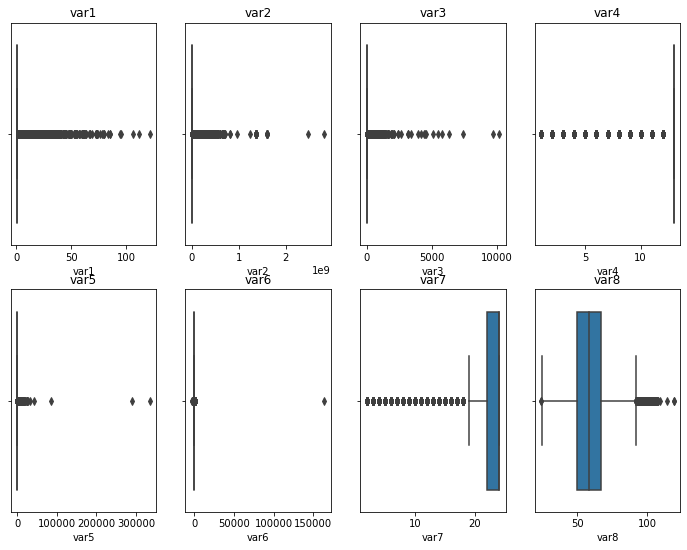

In [7]:
'check distribution of each feature, we need to remove the outliers'
plt.figure(figsize=(12,9))
col = trainGroup.columns
for i in range(8):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(trainGroup[col[i + 1]])
    plt.title(col[i + 1])
#     ax.set_xticklabels(col)
plt.show()

C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gong1078899525\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

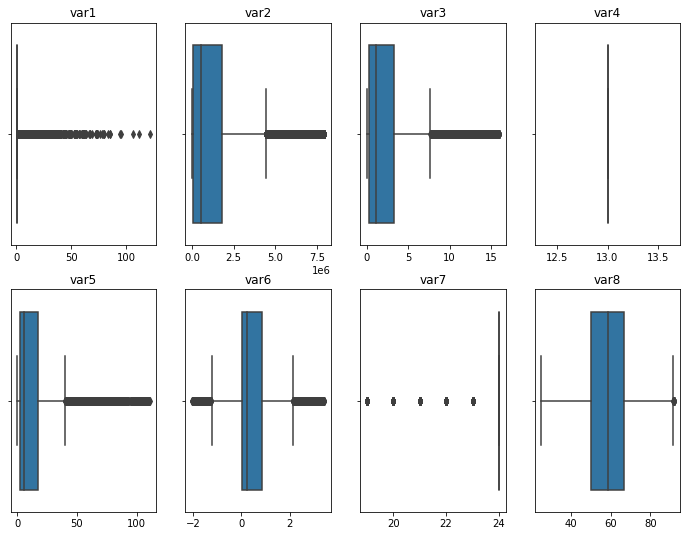

In [8]:
def RemoveOutlier(Data):
    _Data = Data.dropna().copy()
    Q1, Q3 = np.percentile(_Data, 25, axis=0), np.percentile(_Data, 75, axis=0) 
    Cond = (Data >= Q1 - 1.5 * (Q3 - Q1)) & (Data <= Q3 + 1.5 * (Q3 - Q1))
    _Data_ = Data[Cond].copy()
    return _Data_

_trainGroup = trainGroup.copy()
_trainGroup.iloc[:, 2:] = _trainGroup.iloc[:, 2:].apply(RemoveOutlier)

plt.figure(figsize=(12,9))
col = _trainGroup.columns
for i in range(8):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(_trainGroup[col[i + 1]].values)
    plt.title(col[i + 1])
#     ax.set_xticklabels(col)
plt.show()

In [38]:
_trainGroup = _trainGroup.fillna(_trainGroup.mean()).copy()
Y_train, X_train = _trainGroup['event'], _trainGroup.iloc[:, 1:]

_testGroup = testGroup.fillna(testGroup.mean()).copy()
Y_test, X_test = _testGroup['event'], _testGroup.iloc[:, 1:]


Scaler = StandardScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)


In [10]:
x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size = 0.3,random_state=0)#30% of data is splited as test dataset，the rest of 70% is train dataset

In [45]:
# oversampling
model_smote=SMOTE()
x_smote_resampled,y_smote_resampled=model_smote.fit_resample(pd.DataFrame(x_train),y_train.values)  #输入数据进行过抽样处理
y_smote_resampled=pd.DataFrame(y_smote_resampled,columns=['label'])
 
smote_resampled=pd.concat([x_smote_resampled,y_smote_resampled],axis=1)  #将特征和标签重新拼接
group_data_smote=smote_resampled.groupby(['label'])['label'].count()   #查看标签类别个数
group_data_smote

label
0    162958
1    162958
Name: label, dtype: int64

In [46]:
x_smote_resampled.shape

(325916, 8)

### Print the shape of Dataset

In [47]:
print("Train dataset shape:{}".format(x_smote_resampled.shape))
print("Train dataset shape:{}".format(x_valid.shape))
print("Train dataset shape:{}".format(X_test.shape))

Train dataset shape:(325916, 8)
Train dataset shape:(71651, 8)
Train dataset shape:(59709, 8)


### Model fitting

In [48]:
rfc = RandomForestClassifier(min_samples_leaf=10)#使用默认参数将随机森林分类器实例化
rfc.fit(x_smote_resampled,y_smote_resampled)#模型拟合

C:\Users\gong1078899525\AppData\Local\Temp\ipykernel_27768\2731000269.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_smote_resampled,y_smote_resampled)#模型拟合


RandomForestClassifier(min_samples_leaf=10)

### Introduction to AUC
#### AUC: The Area under the Curve of ROC (AUC ROC), 
1. Which means if a positive sample and a negative sample are randomly selected, there is a chance that the classifier will correctly judge the value of the positive sample to be higher than the negative sample
2. The higher AUC, the higher the accuracy of the classifier is
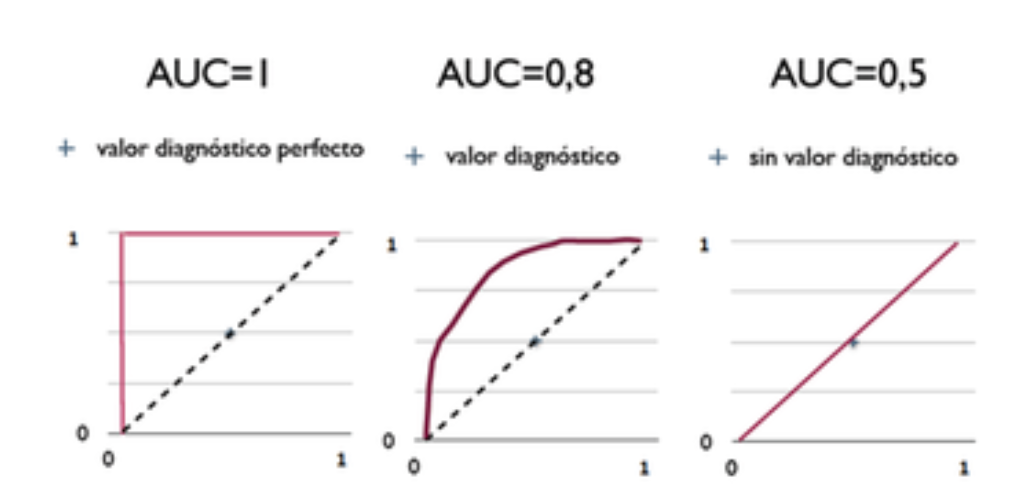

### Evalute the model's performance on validation dataset

In [49]:
#Score 1：the mean accuracy on the given test data and labels
score1 = rfc.score(x_valid,y_valid)
print("The mean accuracy:{}".format(score1))
#返回值：0.93
#得分高于0.9，表示预测效果较好
#Score 2：the AOC

proba = rfc.predict_proba(x_valid) #使用分类器预测测试集中每个样本属于0和1的概率
score2 = roc_auc_score(y_valid,proba[:,1])
print("The AUC:{}".format(score2))

The mean accuracy:0.4773136453085093
The AUC:0.6677343063326577


### Evalute the model's performance on validation dataset

In [50]:
#Score 1：the mean accuracy on the given test data and labels
score1 = rfc.score(X_test,Y_test.values)
print("The mean accuracy:{}".format(score1))
#返回值：0.93
#得分高于0.9，表示预测效果较好
#Score 2：the AOC

proba = rfc.predict_proba(X_test) #使用分类器预测测试集中每个样本属于0和1的概率
score2 = roc_auc_score(Y_test,proba[:,1])
print("The AUC:{}".format(score2))

The mean accuracy:0.9554840978746922
The AUC:0.5714591804491687
